<a href="https://colab.research.google.com/github/maha3069/youtube_tuto/blob/main/langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph
!pip install langchain_groq

## **STATE**

In [ ]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
class State(TypedDict):
  #list of messages
  messages : Annotated[list,add_messages]
builder = StateGraph(State)

## **Noeud1: LLM Call**

In [ ]:
import os
from getpass import getpass

# Prompt to enter the Groq API key securely (won't show on screen)
os.environ["GROQ_API_KEY"] = getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-20b")

In [ ]:

def chatbot(state: State):
 answer = llm.invoke(state["messages"])
 return {"messages": [answer]}
builder.add_node("chatbot", chatbot)




## **Construire Le graph**

In [ ]:
builder.add_edge(START,"chatbot")
builder.add_edge("chatbot",END)

In [ ]:
graph = builder.compile()


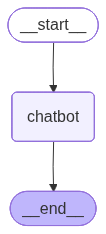

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))


## **Execution**

In [ ]:
from langchain_core.messages import (
 AIMessage,
 HumanMessage,
 SystemMessage)

In [ ]:
input = {"messages": [HumanMessage('hi!')]}
graph.invoke(input)

{'messages': [HumanMessage(content='hi!', additional_kwargs={}, response_metadata={}, id='fb7e79d6-e817-42c2-bd0e-6340955e24fc'),
  AIMessage(content='Hello! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'User says "hi!" It\'s a greeting. We need to respond politely. Possibly ask how we can help.'}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 73, 'total_tokens': 116, 'completion_time': 0.042041414, 'prompt_time': 0.00351099, 'queue_time': 0.199852643, 'total_time': 0.045552404}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--154009ac-6eea-4e0e-9e80-52b990546a39-0', usage_metadata={'input_tokens': 73, 'output_tokens': 43, 'total_tokens': 116})]}

## **Memoire checkpointers**

In [ ]:
input = {"messages": [HumanMessage('hi my name is Maha !')]}
graph.invoke(input)

{'messages': [HumanMessage(content='hi my name is Maha !', additional_kwargs={}, response_metadata={}, id='9c8d68e4-87dc-4b70-b332-65cb7e4128a7'),
  AIMessage(content='Hello Maha! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "hi my name is Maha!". We should respond with friendly greeting. According to the policies, no disallowed content. It\'s a normal greeting. We should ask how to help or what they\'d like to talk about. Also, we should respect that we are an AI, no personal info. Just respond politely.'}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 77, 'total_tokens': 164, 'completion_time': 0.086891019, 'prompt_time': 0.003663994, 'queue_time': 0.20084398, 'total_time': 0.090555013}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--327bd552-0b49-41a4-8af5-e3822081bde6-0', usage_metadata={'input_tokens': 

In [ ]:
input = {"messages": [HumanMessage('What is my Name !')]}
graph.invoke(input)

{'messages': [HumanMessage(content='What is my Name !', additional_kwargs={}, response_metadata={}, id='ce8897d0-9ad8-4bd9-a084-be7b57d16f56'),
  AIMessage(content='I’m not sure what your name is—could you let me know? If you’d rather not share, that’s perfectly fine too. Just let me know how you’d like me to address you!', additional_kwargs={'reasoning_content': 'The user asks: "What is my Name !". This is a bit ambiguous. It might be a joke: they want ChatGPT to guess or ask. We need to respond appropriately. The user hasn\'t provided their name. We might ask them or respond that we don\'t know. According to policy, we should not fabricate personal info. So we should respond politely: I don\'t know your name, but you can tell me. Also we can ask if they want to share. We should not assume. Also we should maintain a friendly tone. There\'s no policy violation. Just respond.'}, response_metadata={'token_usage': {'completion_tokens': 167, 'prompt_tokens': 76, 'total_tokens': 243, 'compl

**Checkpoints:**
* offrent une memoire native (memoire short term)
* ces sont des objets qu'on peut les stoker dans une bases des donnees
* enregistrent le state  du graphe a chaque etape d'execution



In [ ]:
from langgraph.checkpoint.memory import MemorySaver
graph = builder.compile(checkpointer=MemorySaver())
thread1 = {"configurable": {"thread_id": "1"}}
result_1 = graph.invoke(
 { "messages": [HumanMessage("hi, my name is Maha!")] },
 thread1
)
print(result_1)

{'messages': [HumanMessage(content='hi, my name is Maha!', additional_kwargs={}, response_metadata={}, id='bd35d61e-e284-4e39-9e14-f3c7aaab2aff'), AIMessage(content='Hello, Maha! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "hi, my name is Maha!". We need to respond. The system says "You are ChatGPT...". There\'s no instruction for a particular style. The user is greeting. We should respond politely. We can ask how we can help.'}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 78, 'total_tokens': 153, 'completion_time': 0.07480778, 'prompt_time': 0.003744353, 'queue_time': 0.199828503, 'total_time': 0.078552133}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--194fa86d-b270-430b-b136-aa8740d94c16-0', usage_metadata={'input_tokens': 78, 'output_tokens': 75, 'total_tokens': 153})]}


In [ ]:
result_2 = graph.invoke(
 { "messages": [HumanMessage("what is my name?")] },
 thread1
)
#print(result_2)
print("stat2",graph.get_state(thread1))
for i in graph.get_state(thread1)[0]['messages']:
  if isinstance(i,AIMessage):
    print("AI message:",i.content)
    print(i.additional_kwargs)
  if isinstance(i,HumanMessage):
    print("Human message:",i.content)
    print("###########")


stat2 StateSnapshot(values={'messages': [HumanMessage(content='hi, my name is Maha!', additional_kwargs={}, response_metadata={}, id='bd35d61e-e284-4e39-9e14-f3c7aaab2aff'), AIMessage(content='Hello, Maha! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "hi, my name is Maha!". We need to respond. The system says "You are ChatGPT...". There\'s no instruction for a particular style. The user is greeting. We should respond politely. We can ask how we can help.'}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 78, 'total_tokens': 153, 'completion_time': 0.07480778, 'prompt_time': 0.003744353, 'queue_time': 0.199828503, 'total_time': 0.078552133}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--194fa86d-b270-430b-b136-aa8740d94c16-0', usage_metadata={'input_tokens': 78, 'output_tokens': 75, 'total_tokens': 153}), Hu

In [ ]:
state_history = graph.get_state_history(thread1)
for state in state_history:
    print(state)

StateSnapshot(values={'messages': [HumanMessage(content='hi, my name is Maha!', additional_kwargs={}, response_metadata={}, id='bd35d61e-e284-4e39-9e14-f3c7aaab2aff'), AIMessage(content='Hello, Maha! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "hi, my name is Maha!". We need to respond. The system says "You are ChatGPT...". There\'s no instruction for a particular style. The user is greeting. We should respond politely. We can ask how we can help.'}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 78, 'total_tokens': 153, 'completion_time': 0.07480778, 'prompt_time': 0.003744353, 'queue_time': 0.199828503, 'total_time': 0.078552133}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--194fa86d-b270-430b-b136-aa8740d94c16-0', usage_metadata={'input_tokens': 78, 'output_tokens': 75, 'total_tokens': 153}), HumanMes